In [9]:
import sys
sys.path.append('/Users/sdbykov/work/self-supervised-halos/')

In [10]:
import requests
import numpy as np
import h5py
from tqdm import tqdm
import os
from glob import glob

%matplotlib inline

from utils.data.tng_query import get, HaloInfo
from utils.utils import data_path
data_path = data_path+'tng/'

In [11]:
#downloaded_halos = os.listdir(data_path+'/')
downloaded_halos = glob(data_path+'/*_cutout.hdf5')
downloaded_halos = [halo.split('_')[1] for halo in downloaded_halos]
downloaded_halos = list([int(i) for i in downloaded_halos])

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:276: RuntimeWarning: divide by zero encountered in log10
  map_2d = -np.log10(map_2d/np.nanmax(map_2d))


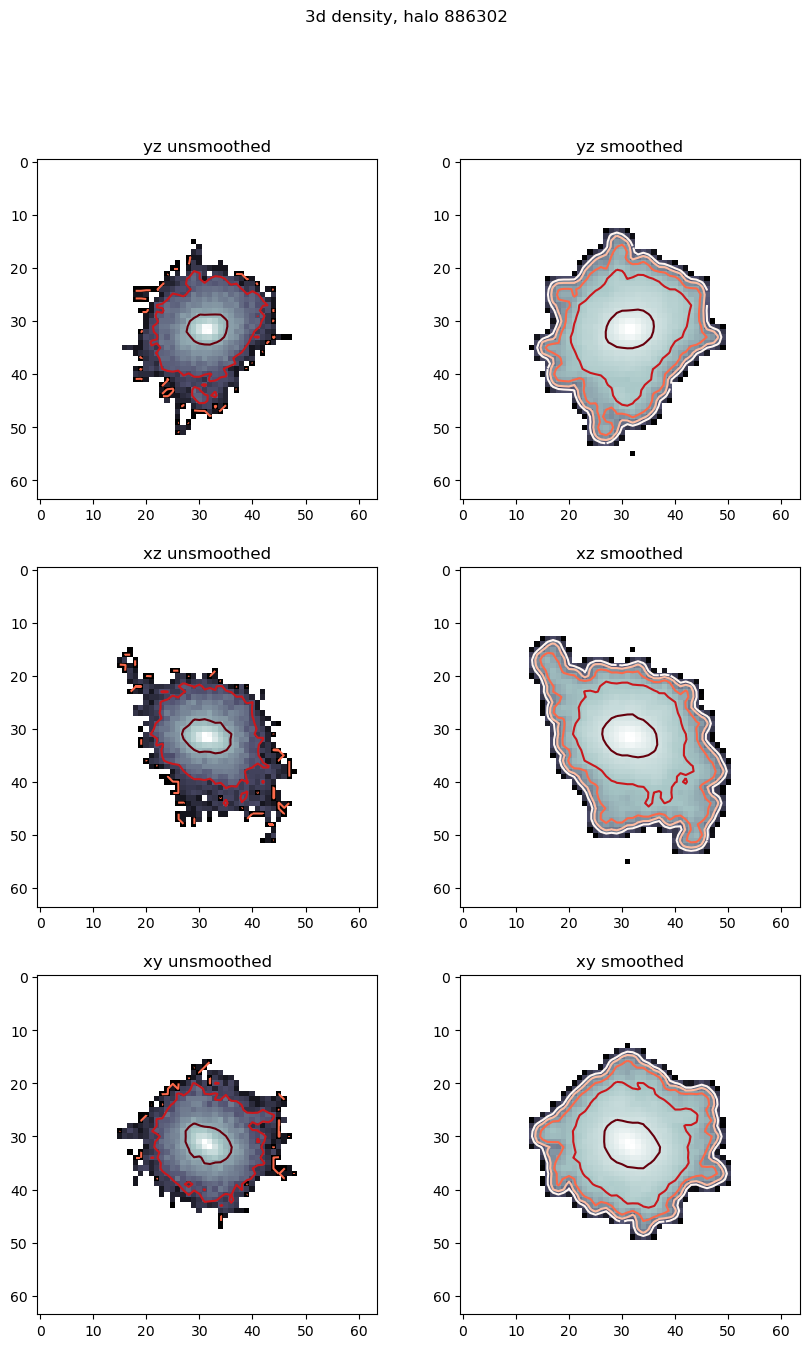

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:300: RuntimeWarning: divide by zero encountered in log10
  


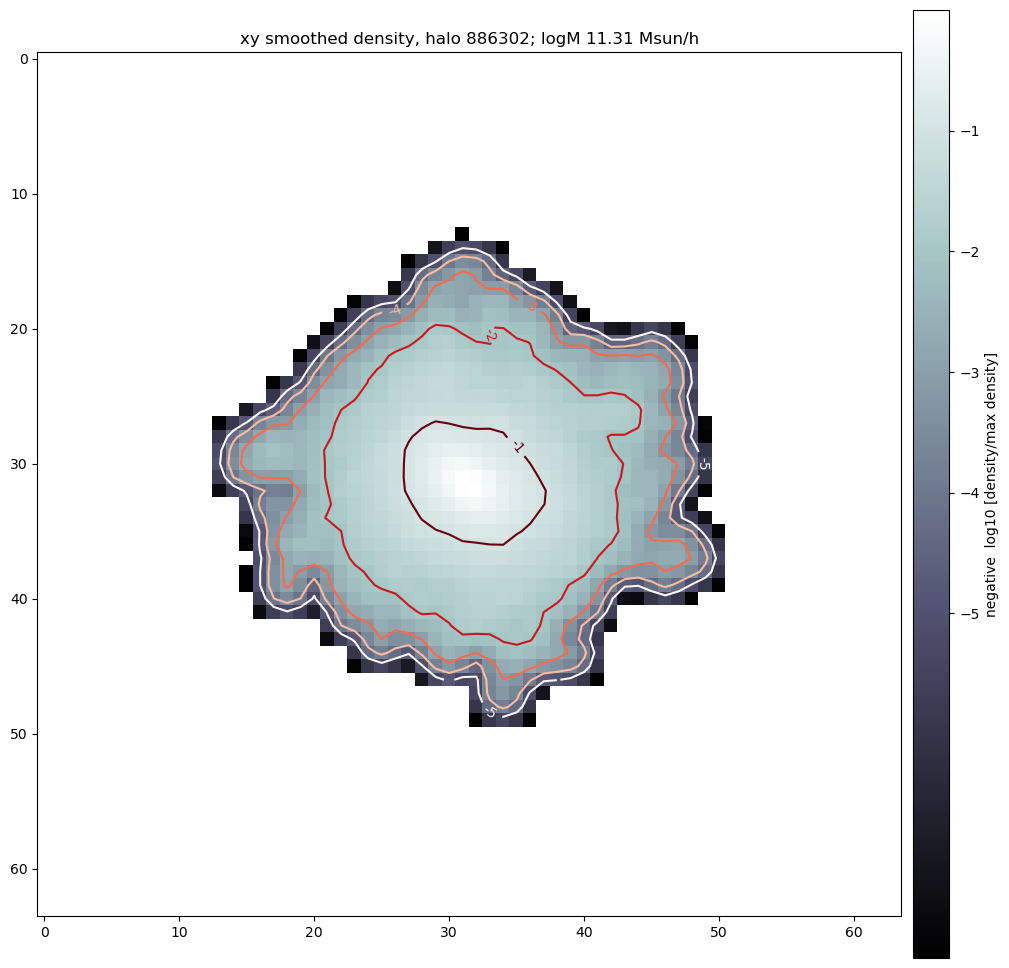

In [14]:
from utils.data.tng_query import HaloInfo

halo = HaloInfo(downloaded_halos[235])


dens = halo.make_3d_density(grid_bins=64)
halo._plot_3d_density(dens)


/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:325: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(map_2d, cmap='bone', norm=LogNorm(vmin=0.01, vmax=5))


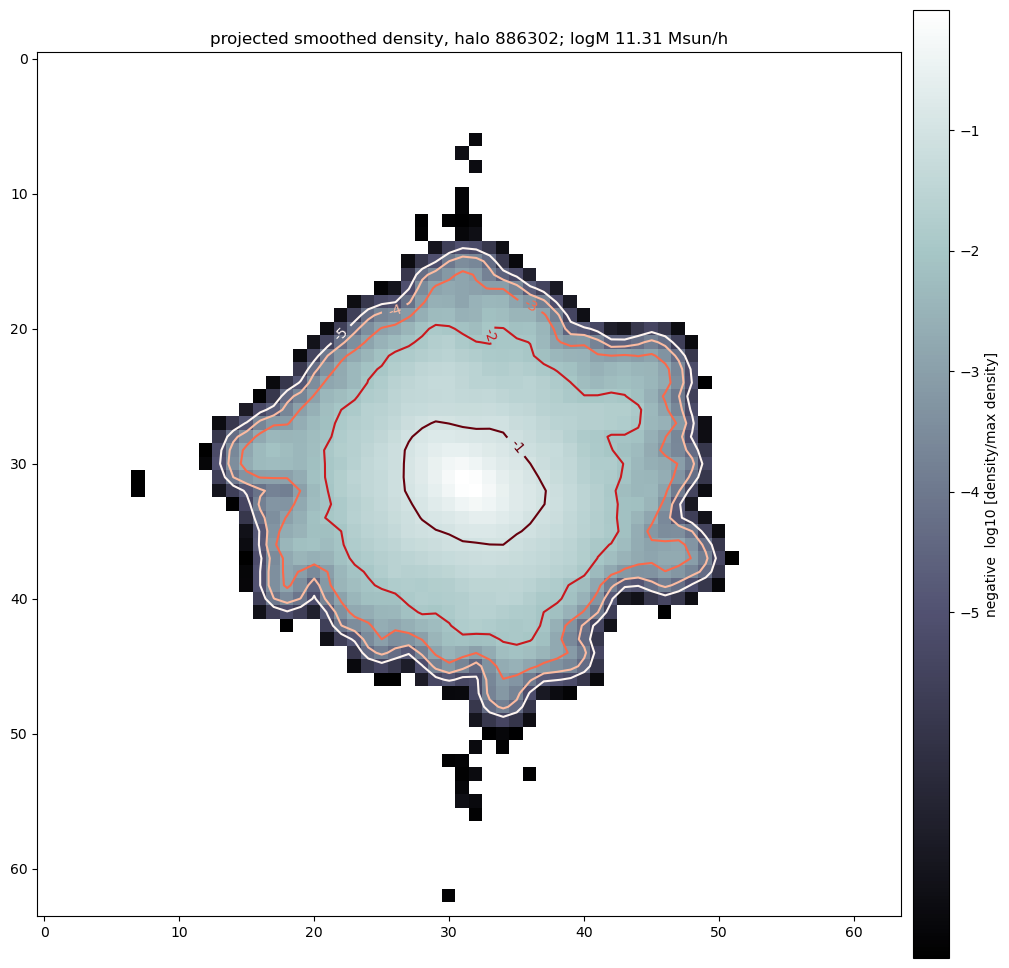

/Users/sdbykov/work/self-supervised-halos/utils/data/tng_query.py:346: RuntimeWarning: divide by zero encountered in log10
  ax = fig.add_subplot(111, projection='3d')


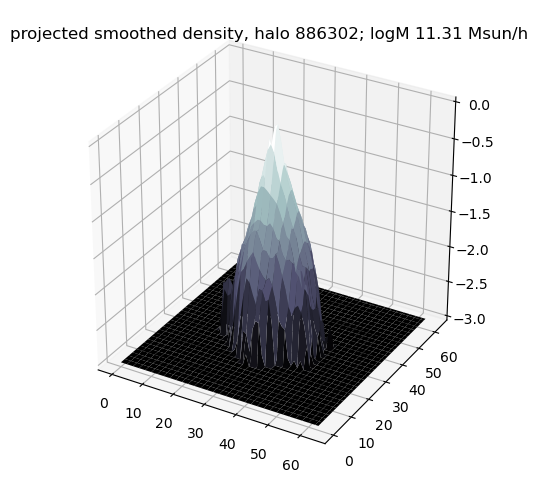

In [16]:

dens_2d = halo.make_2d_density(grid_bins=64)
halo._plot_2d_density(dens_2d)

halo._plot_2d_density_surface(dens_2d)


In [22]:
f = h5py.File(halo.cutout_file, 'r')

In [24]:
f.keys()

<KeysViewHDF5 ['Header', 'PartType1']>